In [1]:
from google.colab import files

In [2]:
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Preg,GLU,BP,ST,INS,BMI,DPF,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,0\r\n13,145,82,19,110,2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense

In [5]:
df=pd.read_csv('diabetes.csv')

In [6]:
df

,Preg,GLU,BP,ST,INS,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
x=df.drop(['Outcome'],axis=1)

In [8]:
y=df['Outcome']

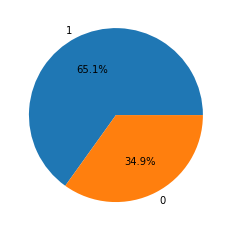

In [9]:
plt.pie(list(df['Outcome'].value_counts()),labels=list(df['Outcome'].unique()),autopct='%2.1f%%')
plt.show()

In [10]:
df[df.GLU>=160].shape[0]

102

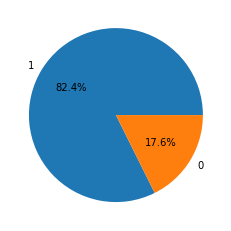

In [11]:
df160=df[df.GLU>=160]
plt.pie(list(df160['Outcome'].value_counts()),labels=list(df160['Outcome'].unique()),autopct='%2.1f%%')
plt.show()

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
Model=keras.Sequential([
                        Dense(10,activation='relu',input_shape=(8,)),
                        Dense(10,activation='relu'),
                        Dense(1,activation='sigmoid')
])

In [14]:
Model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
Model.fit(xtrain,ytrain,epochs=150)

Epoch 1/150
20/20 [==============================] - 1s 2ms/step - loss: 5.1394 - accuracy: 0.6433
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 3.2373 - accuracy: 0.6498
Epoch 3/150
20/20 [==============================] - 0s 1ms/step - loss: 2.0702 - accuracy: 0.6433
Epoch 4/150
20/20 [==============================] - 0s 1ms/step - loss: 1.4170 - accuracy: 0.6564
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 1.1004 - accuracy: 0.6482
Epoch 6/150
20/20 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.6564
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 0.6515
Epoch 8/150
20/20 [==============================] - 0s 1ms/step - loss: 0.8364 - accuracy: 0.6466
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.6336
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 0.7581 - accuracy: 0.6466
Epoch 11/

In [16]:
Model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.7013


[0.6427854299545288, 0.701298713684082]

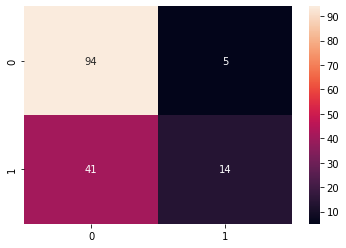

In [17]:
pred=Model.predict(xtest)
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=np.round(pred))
sns.heatmap(con_matrix,annot=True,fmt='d')

In [19]:
Model.predict(xtest[:1])

array([[0.45284337]], dtype=float32)